# SYNcro

####  

**Authors**: Chris Rorden & Steffen Bollmann

**Date:** 8 Jan 2026

### Citation:
#### Tools included in this workflow
__SynthStrip:__

- SynthStrip: Skull-Stripping for Any Brain Image; Andrew Hoopes, Jocelyn S. Mora, Adrian V. Dalca, Bruce Fischl*, Malte Hoffmann* (*equal contribution); NeuroImage 260, 2022, 119474; [https://doi.org/10.1016/j.neuroimage.2022.119474](https://doi.org/10.1016/j.neuroimage.2022.119474)
- Boosting skull-stripping performance for pediatric brain images; William Kelley, Nathan Ngo, Adrian V. Dalca, Bruce Fischl, Lilla Zöllei*, Malte Hoffmann* (*equal contribution); IEEE International Symposium on Biomedical Imaging (ISBI), 2024, forthcoming; [https://arxiv.org/abs/2402.16634](https://arxiv.org/abs/2402.16634)
- SynthStrip tool: [https://w3id.org/synthstrip](https://w3id.org/synthstrip)

#### Dataset
__Opensource Data from OpenNeuro:__
- Makayla Gibson, Roger Newman-Norlund, Leonardo Bonilha, Julius Fridriksson, Gregory Hickok, Argye E. Hillis, Dirk-Bart den Ouden, and Chris Rorden (2023). Aphasia Recovery Cohort (ARC) Dataset. OpenNeuro. [Dataset] doi: [doi:10.18112/openneuro.ds004884.v1.0.0](https://openneuro.org/datasets/ds004884/versions/1.0.0)

__ANTs Brain Templates:__
- Avants, Brian; Tustison, Nick (2018). ANTs/ANTsR Brain Templates. figshare. Dataset. [https://doi.org/10.6084/m9.figshare.915436.v2](https://doi.org/10.6084/m9.figshare.915436.v2)

## Load Software

In [1]:
import module
await module.load('syncro/0.1.1')
await module.list()

['syncro/0.1.1']

## Download Data

In [2]:
%%bash
datalad install https://github.com/OpenNeuroDatasets/ds004884.git
cd ds004884 && datalad get "sub-M2304/ses-262/anat"

[INFO] Attempting a clone into /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/ds004884 
[INFO] Attempting to clone from https://github.com/OpenNeuroDatasets/ds004884.git to /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/ds004884 
[INFO] Start enumerating objects 
[INFO] Start counting objects 
[INFO] Start compressing objects 
[INFO] Start receiving objects 
[INFO] Start resolving deltas 
[INFO] Completed clone attempts for Dataset(/home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/ds004884) 
[INFO] scanning for unlocked files (this may take some time) 
[INFO] Remote origin not usable by git-annex; setting annex-ignore 


install(ok): /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/ds004884 (dataset)
get(ok): sub-M2304/ses-262/anat/sub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz (file)
get(ok): sub-M2304/ses-262/anat/sub-M2304_ses-262_acq-spcir2p2_run-6_FLAIR.nii.gz (file)
get(ok): sub-M2304/ses-262/anat/sub-M2304_ses-262_acq-tfl3p2_run-4_T1w.nii.gz (file)
get(ok): sub-M2304/ses-262/anat (directory)
action summary:
  get (ok: 4)


In [3]:
input_image = 'ds004884/sub-M2304/ses-262/anat/sub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz'

In [4]:
from ipyniivue import NiiVue

nv_subject_space = NiiVue()
nv_subject_space.load_volumes([{"path": input_image}])
nv_subject_space 

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7f1…

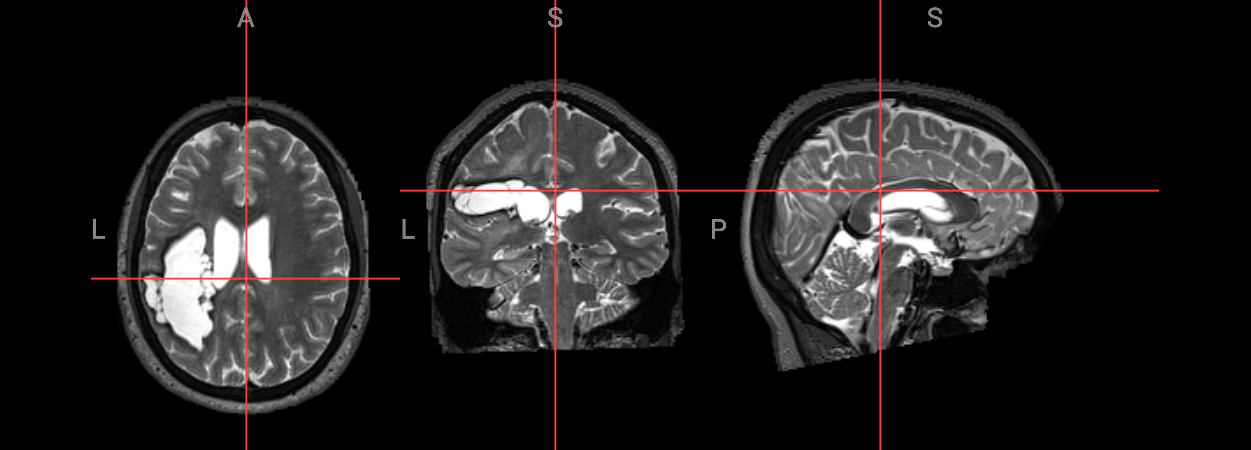

In [19]:
from IPython.display import Image
Image(filename='../../static/examples/structural_imaging/SYNcro/subject_space.png')

In [8]:
!SYNcro.py -h

usage: SYNcro.py [-h] [--force-gpu {true,false,auto}] [-b] [-c] [-d DIRECTORY]
                 [--log {silent,verbose,debug}] [-v]
                 N [N ...]

Normalize NIfTI images with lesion maps.

positional arguments:
  N                     NIfTI images: first is anatomical (required), second
                        (optional) lesion map, third (optional) pathological

options:
  -h, --help            show this help message and exit
  --force-gpu {true,false,auto}
                        Force GPU usage (true), disable GPU (false), or auto-
                        detect (auto, default)
  -b, --bet             images are already brain extracted (default: False)
  -c, --ct              images are CT scans (default: False)
  -d DIRECTORY, --directory DIRECTORY
                        output directory (default: same as input)
  --log {silent,verbose,debug}
                        Set log level: silent (default), verbose, or debug
  -v, --version         show program's version numbe

In [9]:
!SYNcro.py ds004884/sub-M2304/ses-262/anat/sub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz

INFO - Running: /usr/local/bin/py_synthsr --i /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/SYNcro_w7md4lbd/sub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz --o /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/SYNcro_w7md4lbd/t1sub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz --cpu --threads 31
using CPU, hiding all CUDA_VISIBLE_DEVICES
Using general model from January 2023 (version 2)
/freesurfer/models/synthsr_v20_230130.h5
using 31 threads
predicting 1/1
Prediction without flipping
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step
Prediction with flipping
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step

prediction  saved in: /home/jovyan/Git_repositories/neurodeskedu/books/examples/structural_imaging/SYNcro_w7md4lbd/t1sub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz

If you use this tool in a publication, please cite:


Joint super-resolution and synthesis of 1 mm isotropic MP-RAGE volumes from clinical 
MRI exams with scans of different orientation, reso

In [10]:
nv_mni_space = NiiVue()
nv_mni_space.load_volumes([{"path": "wbt1sub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz"}])
nv_mni_space 

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7f1…

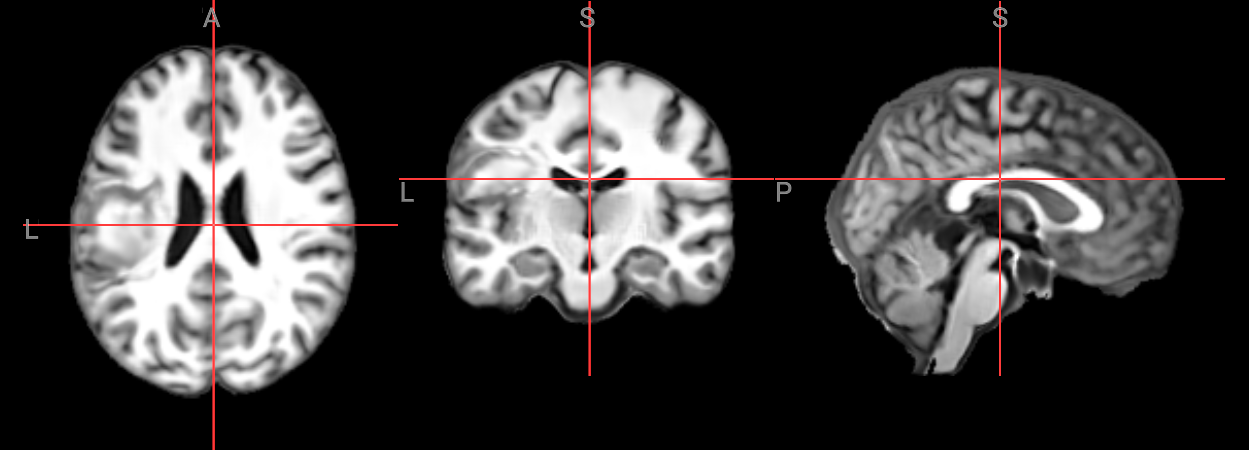

In [13]:
Image(filename='../../static/examples/structural_imaging/SYNcro/mni_wbt1sub-M2304.png')

In [14]:
nv_mni_space = NiiVue()
nv_mni_space.load_volumes([{"path": "wsub-M2304_ses-262_acq-spc3p2_run-5_T2w.nii.gz"}])
nv_mni_space 

NiiVue(clip_plane_depth_azi_elev=[2.0, 0.0, 0.0], draw_lut=None, graph=<ipyniivue.traits.Graph object at 0x7f1…

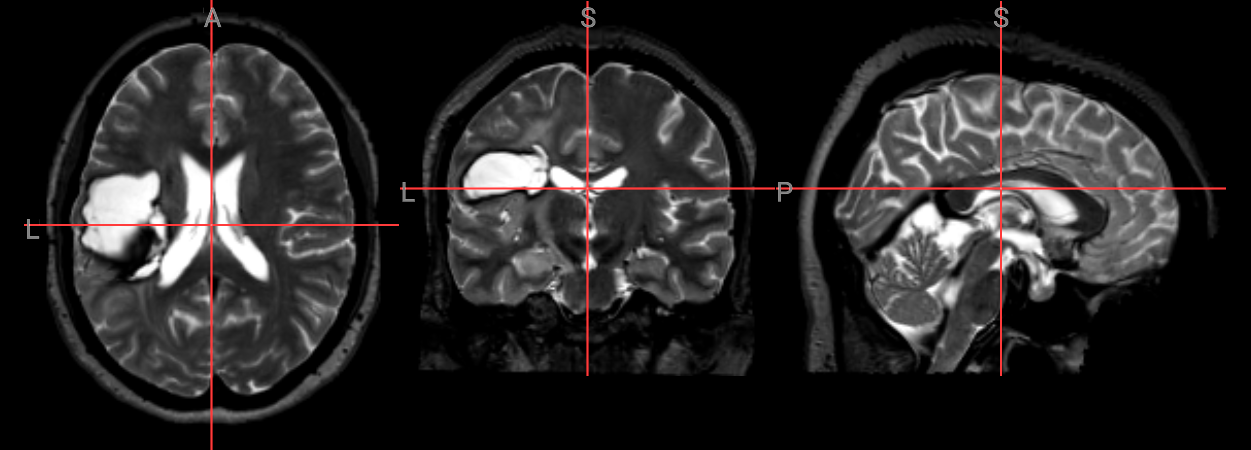

In [16]:
Image(filename='../../static/examples/structural_imaging/SYNcro/mni_wsub-M2304.png')

#### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [5]:
%load_ext watermark

%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2026-01-08T12:24:46.532805+00:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

IPython  : 8.16.1
ipyniivue: 2.4.4

